<tr>
    <td> <img src="imagenes/ml-unison.png" width="200"> </td>
    <td> <img src="imagenes/EscudoUnison.gif" width="200"> </td>
</tr>

# Reconocimiento de Patrones
## Licenciatura en Ciencias de la Computación 
## Proyecto Final

Integrantes: 

    Adrian L. Soto T.   

    Hugo A. Eguino A.
    
Profesor: [**Julio Waissman Vilanova**](http://mat.uson.mx/~juliowaissman/) 

*Ultima revisión*: 24 Noviembre 2020.


En esta libreta analizaremos y experimentaremos los datos de la base de datos "[**Fake news**](https://www.kaggle.com/hassanamin/textdb3)", tomada de kaggle. 

Elegimos esta base de datos, ya que en los ultimos años estas se han vuelto un gran problema en la sociedad. Estas tienen un gran impacto en las redes sociales, por lo que tambien llegan a tener un gran impacto en toda la sociedad. Hazta pueden llegar a afectar la democracia en nuestra sociedad. 

Esta base de datos contiene una tabala donde separa a las noticias por "Fake" o "Real", cada una tiene el titulo de la nota y un poco del articulo de esta. 

Empezaremos inicialisando todos los módulos que necesitaremos.

In [105]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd   
from collections import Counter
from IPython.display import Image  # Esto es para desplegar imágenes en la libreta
from matplotlib.colors import ListedColormap

plt.rcParams['figure.figsize'] = (20,10)
plt.style.use('ggplot')

%matplotlib inline


# Conjuntos de datos de prueba en sklearn que utlizaremos
#----------------------------------------------------------

from sklearn.feature_extraction.text import TfidfVectorizer #Convierte texto a una matriz de recuento de tokens 
from sklearn.datasets import make_moons           # En forma de medialunas 
from sklearn.datasets import make_circles         # En forma de círculos
from sklearn.datasets import make_classification  # Como separación lineal
from sklearn.metrics import accuracy_score
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.preprocessing import StandardScaler #Proporciona varias funciones y clases de transformadores
                                                 #para cambiar los vectores de características sin procesar en 
                                                 #una representación que sea más adecuada para procedimientos mas adelante
from sklearn.model_selection import train_test_split #Divide las matrices o vectores en subconjuntos de prueva y entrenamientos aleatorios 
from sklearn.neighbors import KNeighborsClassifier      # KNN
from sklearn.svm import SVC                             # SVM
from sklearn.tree import DecisionTreeClassifier         # Arbol decisión
from sklearn.ensemble import RandomForestClassifier     # Bósque aleatorios
from sklearn.ensemble import AdaBoostClassifier         # ADA Boost
from sklearn.naive_bayes import GaussianNB              # Naive bayes
from sklearn.linear_model import  LogisticRegression    # Logística con regularización
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis   # Logística con polinomio de orden 2 


Después de haber importado algunos módulos que necesitaremos accedemos a la base de datos, el cual esta en un archivo CSV. Después mostramos cuantas noticias "Fakes" o "Reals" hay. 

In [106]:
datos = pd.read_csv('datos/fake_or_real_news.csv')
datos.shape

Counter(datos['label'])

Counter({'FAKE': 3164, 'REAL': 3171})

Una ves importada la base de datos, separamos los datos en datos de entrenamiento y datos de prueba utilizando la libreria de Sklearn train_test_split

In [107]:
xEntre,xPrueb,yEntre,yPrueb=train_test_split(datos['text'],datos['label'],test_size=0.22)
print(xEntre.shape)
print(xPrueb.shape)
print(yEntre.shape)
print(yPrueb.shape)

(4941,)
(1394,)
(4941,)
(1394,)


Usamo feature_extraction.text de Sklearn para procesar los datos en una matriz 

In [108]:
tfidf=TfidfVectorizer(stop_words='english',max_df=0.8)
xEntre=tfidf.fit_transform(xEntre)
xPrueb=tfidf.transform(xPrueb)
print(xPrueb.shape)
print(xEntre.shape)

(1394, 61336)
(4941, 61336)


Utilizamos difernetes modelos para saber cual era el que mejor se abaptada a los datos y asi optener una mejor precicion.

In [109]:
modelo1=PassiveAggressiveClassifier(max_iter=300)
modelo1.fit(xEntre,yEntre)

modelo2=GaussianNB()
modelo2.fit(xEntre.toarray(),yEntre)

modelo3=DecisionTreeClassifier()
modelo3.fit(xEntre,yEntre)

modelo4=RandomForestClassifier()
modelo4.fit(xEntre,yEntre)

modelo5=SVC()
modelo5.fit(xEntre,yEntre)

modelo6=LogisticRegression()
modelo6.fit(xEntre,yEntre)

LogisticRegression()

predecimo para asi probar los datos en todos los modelos 

In [111]:
yPredic1=modelo1.predict(xPrueb)
yPredic2=modelo2.predict(xPrueb.toarray())
yPredic3=modelo3.predict(xPrueb)
yPredic4=modelo4.predict(xPrueb)
yPredic5=modelo5.predict(xPrueb)
yPredic6=modelo6.predict(xPrueb)

#Se Calculcula la precision
acc1=accuracy_score(yPrueb,yPredic1)
acc2=accuracy_score(yPrueb,yPredic2)
acc3=accuracy_score(yPrueb,yPredic3)
acc4=accuracy_score(yPrueb,yPredic4)
acc5=accuracy_score(yPrueb,yPredic5)
acc6=accuracy_score(yPrueb,yPredic6)

labels={'Passive Aggressive Classifier':acc1,'Gaussian':acc2,'Clasificador de Arbol de decision':acc3,'Clasificador de Bosque aleatorio':acc4,
        'SVC':acc5,'Regrecion logistica':acc6}
for model,accuracy in labels.items():
    print(str(model)+' : '+str(accuracy))

Passive Aggressive Classifier : 0.9512195121951219
Gaussian : 0.8070301291248206
Clasificador de Arbol de decision : 0.8185078909612625
Clasificador de Bosque aleatorio : 0.9045911047345767
SVC : 0.9461979913916786
Regrecion logistica : 0.9311334289813487


Text(0.5, 1.0, 'Noticias falsas')

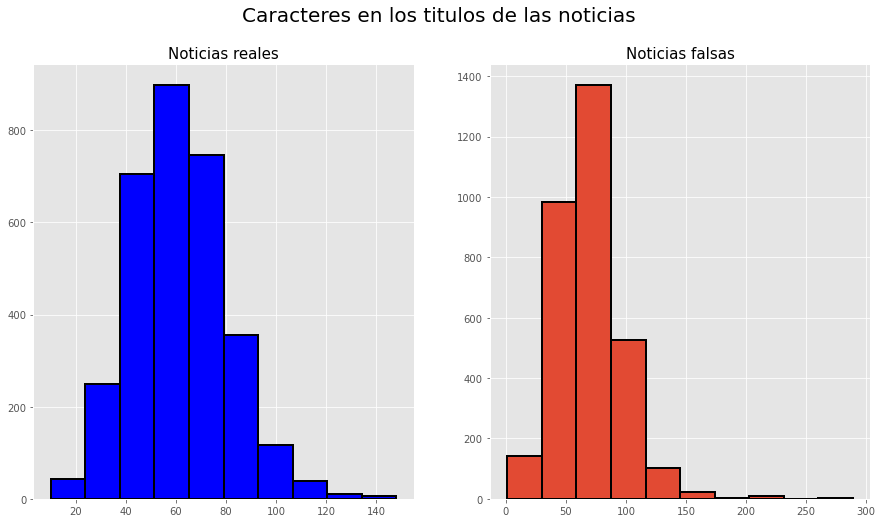

In [112]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
fig.suptitle('Caracteres en los titulos de las noticias',fontsize=20)
datos_len=datos[datos['label']=='REAL']['title'].str.len()
ax1.hist(datos_len,color='blue',linewidth=2,edgecolor='black')
ax1.set_title('Noticias reales',fontsize=15)
datos_len=datos[datos['label']=='FAKE']['title'].str.len()
ax2.hist(datos_len,linewidth=2,edgecolor='black')
ax2.set_title('Noticias falsas',fontsize=15)

In [4]:
fig, (ax1,ax2)=plt.subplots(1,2,figsize=(15,8))
fig.suptitle('Caracteres en el texto de las noticias',fontsize=20)
news_len=datos[datos['label']=='REAL']['text'].str.len()
ax1.hist(news_len,color='blue',linewidth=2,edgecolor='black')
ax1.set_title('Noticias reales',fontsize=15)
news_len=datos[datos['label']=='FAKE']['text'].str.len()
ax2.hist(news_len,linewidth=2,edgecolor='black')
ax2.set_title('Noticias falsas',fontsize=15)

NameError: name 'plt' is not defined